In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/analysis/replication_timing')

之前用的danRer10的，需要转danRer11再做

In [3]:
# import glob
# preMBT_df = pd.read_csv('GSE85713_pre_MBT_average.txt', names = ['chr_name', 'position', 'timing'], sep = "\t", header = None)
# preMBT_bed = preMBT_df.copy()
# preMBT_bed['chr'] = 'chr' + preMBT_bed['chr_name'].astype(str)
# preMBT_bed['start'] = preMBT_bed['position']
# preMBT_bed['end'] = preMBT_bed['position'] + 1
# preMBT_bed[['chr', 'start', 'end', 'timing']].to_csv('GSE85713_pre_MBT_average.bedGraph', sep = "\t", header = False, index = False)


In [4]:
# import glob
# dome_df = pd.read_csv('GSE85713_Dome_average.txt', names = ['chr_name', 'position', 'timing'], sep = "\t", header = None)
# dome_bed = dome_df.copy()
# dome_bed['chr'] = 'chr' + dome_bed['chr_name'].astype(str)
# dome_bed['start'] = dome_bed['position']
# dome_bed['end'] = dome_bed['position'] + 1
# dome_bed[['chr', 'start', 'end', 'timing']].to_csv('GSE85713_Dome_average.bedGraph', sep = "\t", header = False, index = False)


# intersect bdg (not used)
.meanCovOverExpect_log10.bedGraph with GSE85713_*_average.bedGraph

In [70]:
%%bash
### 256(cov) intersect pre-MBT(timing)
for cov_bdg in $(ls ../*256*.meanCovOverExpect_log10.bedGraph);do
    name1=$(basename ${cov_bdg})
    name=${name1%%.*}
    rep_dir=/mnt/Storage/home/wangwen/project/fitCR/source/GR2017/
    bedtools intersect -a $cov_bdg -b ${rep_dir}/GSE85713_pre_MBT_average_danRer11_filtered.bdg -wa -wb > ${name}.logCov_repTiming_preMBT.intersect
done

In [71]:
%%bash
### 1k(cov) intersect pre-MBT(timing)
for cov_bdg in $(ls ../*1k*.meanCovOverExpect_log10.bedGraph);do
    name1=$(basename ${cov_bdg})
    name=${name1%%.*}
    rep_dir=/mnt/Storage/home/wangwen/project/fitCR/source/GR2017/
    bedtools intersect -a $cov_bdg -b ${rep_dir}/GSE85713_pre_MBT_average_danRer11_filtered.bdg -wa -wb > ${name}.logCov_repTiming_preMBT.intersect
done

In [72]:
%%bash
### 4.5hpf(cov) intersect dome(timing)
for cov_bdg in $(ls ../*4-5h*.meanCovOverExpect_log10.bedGraph);do
    name1=$(basename ${cov_bdg})
    name=${name1%%.*}
    rep_dir=/mnt/Storage/home/wangwen/project/fitCR/source/GR2017/
    bedtools intersect -a $cov_bdg -b ${rep_dir}/GSE85713_Dome_average_danRer11_filtered.bdg -wa -wb > ${name}.logCov_repTiming_dome.intersect
done

Process is interrupted.


In [73]:
%%bash
### 5.5hpf(cov) intersect dome(timing)
for cov_bdg in $(ls ../*5-5h*.meanCovOverExpect_log10.bedGraph);do
    name1=$(basename ${cov_bdg})
    name=${name1%%.*}
    rep_dir=/mnt/Storage/home/wangwen/project/fitCR/source/GR2017/
    bedtools intersect -a $cov_bdg -b ${rep_dir}/GSE85713_Dome_average_danRer11_filtered.bdg -wa -wb > ${name}.logCov_repTiming_dome.intersect
done

Process is interrupted.


In [12]:
bin_bed = pd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/genome_bin/danRer11_2_main.200kWin.10kStep.bed', 
                      sep = "\t", header = None, names = ['bin_chr', 'bin_start', 'bin_end', 'bin_name'])
bin_bed

,bin_chr,bin_start,bin_end,bin_name
0,chr1,0,200000,bin_chr1_0
1,chr1,10000,210000,bin_chr1_1
2,chr1,20000,220000,bin_chr1_2
3,chr1,30000,230000,bin_chr1_3
4,chr1,40000,240000,bin_chr1_4
...,...,...,...,...
133687,chr9,56230000,56430000,bin_chr9_5623
133688,chr9,56240000,56440000,bin_chr9_5624
133689,chr9,56250000,56450000,bin_chr9_5625
133690,chr9,56260000,56459846,bin_chr9_5626


# pos/neg 1Mb bins' rep timing

In [74]:
%%bash
cd ~/maternal_loading/1.private_data/20221209_WGS/analysis/replication_timing
rep_dir=/mnt/Storage/home/wangwen/project/fitCR/source/GR2017/
for r in pos neg;do
    for N in 2N 4N;do
        for stage in 256 1k;do
            bedtools intersect -a ../Npm2a-${stage}-${N}.${r}_1Mb.bed -b ${rep_dir}/GSE85713_pre_MBT_average_danRer11_filtered.bdg -wa -wb | grep -v chr4 > Npm2a-${stage}-${N}.${r}_1Mb.rep_tim_preMBT.bed
        done
        for stage in 4p5 5p5;do
            bedtools intersect -a ../Npm2a-${stage}-${N}.${r}_1Mb.bed -b ${rep_dir}/GSE85713_Dome_average_danRer11_filtered.bdg -wa -wb | grep -v chr4 > Npm2a-${stage}-${N}.${r}_1Mb.rep_tim_Dome.bed
        done
    done
done

## total replication timing points

In [75]:
bin1Mb_rep_timing_df = pd.DataFrame()
for r in ['pos', 'neg'] :
    for N in ['2N', '4N'] :
        for stage in ['256', '1k'] :
            ls = pd.read_csv(f'Npm2a-{stage}-{N}.{r}_1Mb.rep_tim_preMBT.bed', sep = "\t", header = None)[6]
            name = f'{r} {N} {stage} preMBT'
            df = pd.DataFrame()
            df['replication timing'] = ls
            df['name'] = name
            bin1Mb_rep_timing_df = pd.concat([bin1Mb_rep_timing_df, df])
            
        for stage in ['4p5', '5p5'] :
            ls = pd.read_csv(f'Npm2a-{stage}-{N}.{r}_1Mb.rep_tim_Dome.bed', sep = "\t", header = None)[6]
            name = f'{r} {N} {stage} Dome'
            df = pd.DataFrame()
            df['replication timing'] = ls
            df['name'] = name
            bin1Mb_rep_timing_df = pd.concat([bin1Mb_rep_timing_df, df])      

            
bin1Mb_rep_timing_df[['region', 'N', 'stage', 'rep_tim_stage']] = bin1Mb_rep_timing_df['name'].str.split(' ', expand = True)
bin1Mb_rep_timing_df

,replication timing,name,region,N,stage,rep_tim_stage
0,-2.940401,pos 2N 256 preMBT,pos,2N,256,preMBT
1,-2.923964,pos 2N 256 preMBT,pos,2N,256,preMBT
2,-2.926867,pos 2N 256 preMBT,pos,2N,256,preMBT
3,-2.930919,pos 2N 256 preMBT,pos,2N,256,preMBT
4,-2.947042,pos 2N 256 preMBT,pos,2N,256,preMBT
...,...,...,...,...,...,...
122729,0.451401,neg 4N 5p5 Dome,neg,4N,5p5,Dome
122730,-0.236457,neg 4N 5p5 Dome,neg,4N,5p5,Dome
122731,-0.440402,neg 4N 5p5 Dome,neg,4N,5p5,Dome
122732,1.419481,neg 4N 5p5 Dome,neg,4N,5p5,Dome


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N_pos v.s. 4N_neg: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.888e-02 U_stat=1.076e+09
2N_pos v.s. 2N_neg: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.669e-66 U_stat=2.718e+08
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N_pos v.s. 4N_neg: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.297e-304 U_stat=1.928e+09
2N_pos v.s. 2N_neg: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.054e-43 U_stat=3.299e+08
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N_pos v.s. 4N_neg: Mann-Whitney-Wi

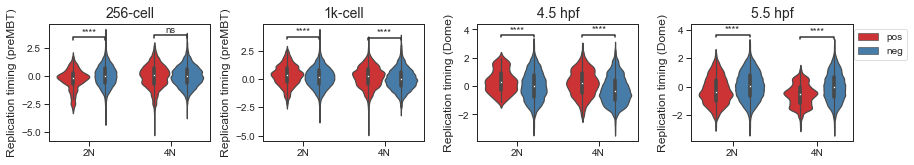

In [77]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    title_ls = ['256-cell', '1k-cell', '4.5 hpf', '5.5 hpf']
    fig, axes = plt.subplots(1, 4, figsize = (6.4 * 2, 4.8 * .5), tight_layout = True)
    for i,stage in enumerate(['256', '1k', '4p5', '5p5']) :
        ax = axes[i]
        df = bin1Mb_rep_timing_df.loc[bin1Mb_rep_timing_df['stage'] == stage]
        sns.violinplot(
            data = df,
            x = 'N',
            y = 'replication timing',
            hue = 'region',
            ax = ax,
            palette = 'Set1'
        )
        ax.set_title(title_ls[i])
        ax.set_xlabel('')
        ax.set_ylabel(f'Replication timing ({df["rep_tim_stage"].unique()[0]})')
        
        add_stat_annotation(ax, data=df, x='N', y='replication timing', hue = 'region',
                box_pairs=[((x.get_text(), 'pos'), (x.get_text(), 'neg')) for x in ax.get_xticklabels()],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)        

        if i == 3 :
            h,l = ax.get_legend_handles_labels()
            ax.legend(h, l, title = '', loc = 'upper right', bbox_to_anchor = (1.37, 1))
        else :
            ax.get_legend().set_visible(False)
            
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make6_violin_reptiming_1MbBin_posNeg.pdf', transparent = True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N_pos v.s. 4N_neg: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.483e-01 U_stat=1.076e+09
2N_pos v.s. 2N_neg: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.503e-66 U_stat=2.718e+08
2N_neg v.s. 4N_pos: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.440e-02 U_stat=2.276e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N_pos v.s. 4N_neg: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.445e-304 U_stat=1.928e+09
2N_pos v.s. 2N_neg: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.581e-43 U_stat=3.299e+08
2N_neg v.s. 4N_pos: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correcti

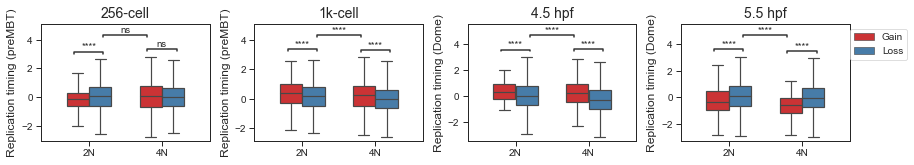

In [78]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    title_ls = ['256-cell', '1k-cell', '4.5 hpf', '5.5 hpf']
    fig, axes = plt.subplots(1, 4, figsize = (6.4 * 2, 4.8 * .5), tight_layout = True)
    for i,stage in enumerate(['256', '1k', '4p5', '5p5']) :
        ax = axes[i]
        df = bin1Mb_rep_timing_df.loc[bin1Mb_rep_timing_df['stage'] == stage]
        sns.boxplot(
            data = df,
            x = 'N',
            y = 'replication timing',
            hue = 'region',
            ax = ax,
            palette = 'Set1',
            width = .618,
            showfliers = False
        )
        ax.set_title(title_ls[i])
        ax.set_xlabel('')
        ax.set_ylabel(f'Replication timing ({df["rep_tim_stage"].unique()[0]})')
        
        add_stat_annotation(ax, data=df, x='N', y='replication timing', hue = 'region',
                box_pairs=[((x.get_text(), 'pos'), (x.get_text(), 'neg')) for x in ax.get_xticklabels()] + [(('2N', 'neg'), ('4N', 'pos'))],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)        

        if i == 3 :
            h,l = ax.get_legend_handles_labels()
            ax.legend(h, ['Gain', 'Loss'], title = '', loc = 'upper right', bbox_to_anchor = (1.37, 1))
        else :
            ax.get_legend().set_visible(False)
            
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make6_box_reptiming_1MbBin_posNeg.pdf', transparent = True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.813e-02 U_stat=2.234e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.860e-17 U_stat=3.144e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.919e-219 U_stat=1.648e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: M

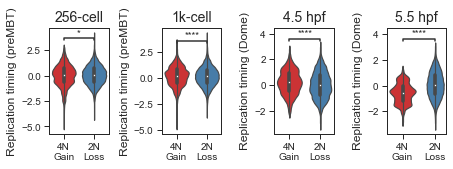

In [79]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    title_ls = ['256-cell', '1k-cell', '4.5 hpf', '5.5 hpf']
    fig, axes = plt.subplots(1, 4, figsize = (6.4 * 1, 4.8 * .5), tight_layout = True)
    for i,stage in enumerate(['256', '1k', '4p5', '5p5']) :
        ax = axes[i]
        df = bin1Mb_rep_timing_df.loc[bin1Mb_rep_timing_df['stage'] == stage].copy()
        df = df.loc[((df['N'] == '2N') & (df['region'] == 'neg')) | ((df['N'] == '4N') & (df['region'] == 'pos'))]
        sns.violinplot(
            data = df,
            x = 'N',
            y = 'replication timing',
#             hue = 'region',
            ax = ax,
            palette = 'Set1'
        )
        ax.set_title(title_ls[i])
        ax.set_xlabel('')
        ax.set_ylabel(f'Replication timing ({df["rep_tim_stage"].unique()[0]})')
        
        add_stat_annotation(ax, data=df, x='N', y='replication timing',
                box_pairs=[('2N', '4N')],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)        

#         if i == 3 :
#             h,l = ax.get_legend_handles_labels()
#             ax.legend(h, l, title = '', loc = 'upper right', bbox_to_anchor = (1.37, 1))
#         else :
#             ax.get_legend().set_visible(False)
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(['4N\nGain', '2N\nLoss'])
            
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make6_violin_reptiming_1MbBin_2NNeg_4NPos.pdf', transparent = True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.813e-02 U_stat=2.234e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.860e-17 U_stat=3.144e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.919e-219 U_stat=1.648e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: M

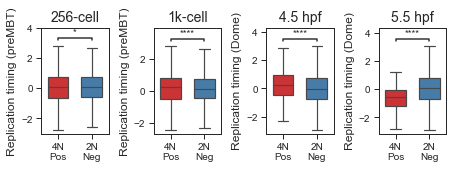

In [80]:
### used
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    title_ls = ['256-cell', '1k-cell', '4.5 hpf', '5.5 hpf']
    fig, axes = plt.subplots(1, 4, figsize = (6.4 * 1, 4.8 * .5), tight_layout = True)
    for i,stage in enumerate(['256', '1k', '4p5', '5p5']) :
        ax = axes[i]
        df = bin1Mb_rep_timing_df.loc[bin1Mb_rep_timing_df['stage'] == stage].copy()
        df = df.loc[((df['N'] == '2N') & (df['region'] == 'neg')) | ((df['N'] == '4N') & (df['region'] == 'pos'))]
        sns.boxplot(
            data = df,
            x = 'N',
            y = 'replication timing',
#             hue = 'region',
            ax = ax,
            palette = 'Set1',
            width = .618,
            showfliers = False
        )
        ax.set_title(title_ls[i])
        ax.set_xlabel('')
        ax.set_ylabel(f'Replication timing ({df["rep_tim_stage"].unique()[0]})')
        
        add_stat_annotation(ax, data=df, x='N', y='replication timing',
                box_pairs=[('2N', '4N')],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)        

#         if i == 3 :
#             h,l = ax.get_legend_handles_labels()
#             ax.legend(h, l, title = '', loc = 'upper right', bbox_to_anchor = (1.37, 1))
#         else :
#             ax.get_legend().set_visible(False)
            
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(['4N\nPos', '2N\nNeg'])
        
    fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make6_box_reptiming_1MbBin_2NNeg_4NPos.pdf', transparent = True)

## mean by co-ordinary (not used)

In [81]:
bin1Mb_rep_timing_mean_df = pd.DataFrame()
for r in ['pos', 'neg'] :
    for N in ['2N', '4N'] :
        for stage in ['256', '1k'] :
            ls = pd.read_csv(f'Npm2a-{stage}-{N}.{r}_1Mb.rep_tim_preMBT.bed', sep = "\t", header = None, usecols = [0,1,2,6]).groupby([0,1,2]).mean().reset_index()[6]
            name = f'{r} {N} {stage} preMBT'
            df = pd.DataFrame()
            df['replication timing'] = ls
            df['name'] = name
            bin1Mb_rep_timing_mean_df = pd.concat([bin1Mb_rep_timing_mean_df, df])
            
        for stage in ['4p5', '5p5'] :
            ls = pd.read_csv(f'Npm2a-{stage}-{N}.{r}_1Mb.rep_tim_Dome.bed', sep = "\t", header = None)[6]
            name = f'{r} {N} {stage} Dome'
            df = pd.DataFrame()
            df['replication timing'] = ls
            df['name'] = name
            bin1Mb_rep_timing_mean_df = pd.concat([bin1Mb_rep_timing_mean_df, df])      

            
bin1Mb_rep_timing_mean_df[['region', 'N', 'stage', 'rep_tim_stage']] = bin1Mb_rep_timing_mean_df['name'].str.split(' ', expand = True)
bin1Mb_rep_timing_mean_df

,replication timing,name,region,N,stage,rep_tim_stage
0,-1.747290,pos 2N 256 preMBT,pos,2N,256,preMBT
1,0.194963,pos 2N 256 preMBT,pos,2N,256,preMBT
2,0.390854,pos 2N 256 preMBT,pos,2N,256,preMBT
3,0.170777,pos 2N 256 preMBT,pos,2N,256,preMBT
4,-0.317365,pos 2N 256 preMBT,pos,2N,256,preMBT
...,...,...,...,...,...,...
122729,0.451401,neg 4N 5p5 Dome,neg,4N,5p5,Dome
122730,-0.236457,neg 4N 5p5 Dome,neg,4N,5p5,Dome
122731,-0.440402,neg 4N 5p5 Dome,neg,4N,5p5,Dome
122732,1.419481,neg 4N 5p5 Dome,neg,4N,5p5,Dome


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.048e-01 U_stat=9.934e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.159e-01 U_stat=1.137e+04
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.919e-219 U_stat=1.648e+09
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

4N v.s. 2N: M

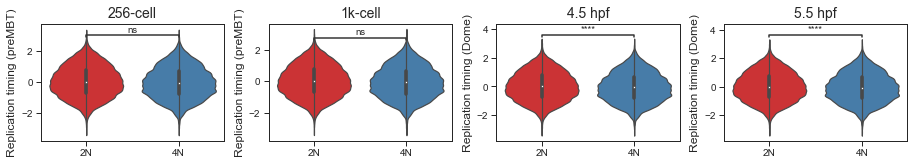

In [82]:
from statannot import add_stat_annotation

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    title_ls = ['256-cell', '1k-cell', '4.5 hpf', '5.5 hpf']
    fig, axes = plt.subplots(1, 4, figsize = (6.4 * 2, 4.8 * .5), tight_layout = True)
    for i,stage in enumerate(['256', '1k', '4p5', '5p5']) :
        ax = axes[i]
        df = bin1Mb_rep_timing_mean_df.loc[bin1Mb_rep_timing_mean_df['stage'] == stage]
        df = df.loc[((df['N'] == '2N') & (df['region'] == 'neg')) | ((df['N'] == '4N') & (df['region'] == 'pos'))]
        sns.violinplot(
            data = bin1Mb_rep_timing_mean_df,
            x = 'N',
            y = 'replication timing',
#             hue = 'region',
            ax = ax,
            palette = 'Set1'
        )
        ax.set_title(title_ls[i])
        ax.set_xlabel('')
        ax.set_ylabel(f'Replication timing ({df["rep_tim_stage"].unique()[0]})')
        
        add_stat_annotation(ax, data=df, x='N', y='replication timing',
                box_pairs=[('2N', '4N')],
                test='Mann-Whitney', text_format='star', loc='inside', verbose=2)        

#         if i == 3 :
#             h,l = ax.get_legend_handles_labels()
#             ax.legend(h, l, title = '', loc = 'upper right', bbox_to_anchor = (1.37, 1))
#         else :
#             ax.get_legend().set_visible(False)
            
#     fig.savefig('/mnt/Storage/home/wangyiman/maternal_loading/1.private_data/20221209_WGS/figures/make6_violin_reptiming_1MbBin_posNeg.pdf', transparent = True)